# Titanic dataset

1.	Perform data preprocessing, which includes handling missing values, converting categorical features to numerical, and feature scaling.

In [46]:
#right code to compile
# %pip install pandas numpy
# %pip install xlrd

import pandas as pd
# import numpy as np

titanic = pd.read_excel("../data/titanic3.xls")
# df_21_22 = pd.read_csv('files/grades 21-22_anonymous.csv', sep=';')
# df_22_23 = pd.read_csv('files/grades 21-22_anonymous.csv', sep=';')

titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [47]:
titanic = titanic.rename(columns={'pclass': 'Passenger Class', 'survived': 'Survived', 'name': 'Name', 'sex': 'Sex', 'age': 'Age', 'sibsp': 'Siblings/spouses aboard', 'parch': 'Parents/children aboard', 'ticket': 'Ticket number', 'fare': 'Passenger fare', 'cabin': 'Cabin no.', 'embarked': 'Port of Embarkation', 'boat': 'Lifeboat no.', 'body': 'Body no.', 'home.dest': 'Home/Destination'})
titanic.head(2)

,Passenger Class,Survived,Name,Sex,Age,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Lifeboat no.,Body no.,Home/Destination
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [48]:
titanic["Age"] = titanic["Age"].round()

def change_name(abbr):
    if abbr == 'S':
        return 'Southhampton'
    elif abbr == 'C':
        return 'Cherbourg'
    elif abbr == 'Q':
        return 'Queenstown'
    else:
        return abbr

titanic["Port of Embarkation"] = titanic["Port of Embarkation"].apply(change_name)

def change_sex(gender):
    if gender == 'female':
        return 1
    elif gender == 'male':
        return 0
    else:
        return gender

titanic["Sex"] = titanic["Sex"].apply(change_sex)

import math

def print_second_part_of_string(string):
    if string is None or not isinstance(string, str):
        return math.nan
    string_object = str(string)
    parts = string_object.split("/")
    if len(parts) > 1:
        return parts[1]
    else:
        return math.nan

def print_first_part_of_string(string):
    if string is None or not isinstance(string, str):
        return math.nan
    string_object = str(string)
    parts = string_object.split("/")
    return parts[0]

new_destination_column = titanic['Home/Destination'].copy()
titanic['Destination'] = new_destination_column
titanic['Destination'] = titanic["Destination"].apply(print_second_part_of_string)

titanic['Home/Destination'] = titanic["Home/Destination"].apply(print_first_part_of_string)
titanic = titanic.rename(columns={'Home/Destination':'Home'})

titanic.head(2)

,Passenger Class,Survived,Name,Sex,Age,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Lifeboat no.,Body no.,Home,Destination
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,Southhampton,2,NaN,"St Louis, MO",NaN
1,1,1,"Allison, Master. Hudson Trevor",0,1.0,1,2,113781,151.5500,C22 C26,Southhampton,11,NaN,"Montreal, PQ","Chesterville, ON"


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Passenger Class          1309 non-null   int64  
 1   Survived                 1309 non-null   int64  
 2   Name                     1309 non-null   object 
 3   Sex                      1309 non-null   int64  
 4   Age                      1046 non-null   float64
 5   Siblings/spouses aboard  1309 non-null   int64  
 6   Parents/children aboard  1309 non-null   int64  
 7   Ticket number            1309 non-null   object 
 8   Passenger fare           1308 non-null   float64
 9   Cabin no.                295 non-null    object 
 10  Port of Embarkation      1307 non-null   object 
 11  Lifeboat no.             486 non-null    object 
 12  Body no.                 121 non-null    float64
 13  Home                     745 non-null    object 
 14  Destination             

In [50]:
titanic[(titanic['Parents/children aboard'] == 0) & (titanic['Siblings/spouses aboard'] == 0) ]

,Passenger Class,Survived,Name,Sex,Age,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Lifeboat no.,Body no.,Home,Destination
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,Southhampton,2,NaN,"St Louis, MO",NaN
5,1,1,"Anderson, Mr. Harry",0,48.0,0,0,19952,26.5500,E12,Southhampton,3,NaN,"New York, NY",NaN
7,1,0,"Andrews, Mr. Thomas Jr",0,39.0,0,0,112050,0.0000,A36,Southhampton,NaN,NaN,"Belfast, NI",NaN
9,1,0,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,NaN,Cherbourg,NaN,22.0,"Montevideo, Uruguay",NaN
12,1,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,B35,Cherbourg,9,NaN,"Paris, France",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",0,NaN,0,0,2647,7.2250,NaN,Cherbourg,NaN,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",0,NaN,0,0,2627,14.4583,NaN,Cherbourg,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.0,0,0,2656,7.2250,NaN,Cherbourg,NaN,304.0,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",0,27.0,0,0,2670,7.2250,NaN,Cherbourg,NaN,NaN,NaN,NaN


In [51]:
titanic_survived_alone = titanic[(titanic['Parents/children aboard'] == 0) & (titanic['Siblings/spouses aboard'] == 0) & (titanic['Survived'] == 1)]
titanic_survived_alone

,Passenger Class,Survived,Name,Sex,Age,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Lifeboat no.,Body no.,Home,Destination
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0,0,0,24160,211.3375,B5,Southhampton,2,NaN,"St Louis, MO",NaN
5,1,1,"Anderson, Mr. Harry",0,48.0,0,0,19952,26.5500,E12,Southhampton,3,NaN,"New York, NY",NaN
12,1,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,B35,Cherbourg,9,NaN,"Paris, France",NaN
13,1,1,"Barber, Miss. Ellen ""Nellie""",1,26.0,0,0,19877,78.8500,NaN,Southhampton,6,NaN,NaN,NaN
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,A23,Southhampton,B,NaN,"Hessle, Yorks",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,3,1,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0000,NaN,Southhampton,15,NaN,NaN,NaN
1260,3,1,"Turja, Miss. Anna Sofia",1,18.0,0,0,4138,9.8417,NaN,Southhampton,15,NaN,NaN,NaN
1261,3,1,"Turkula, Mrs. (Hedwig)",1,63.0,0,0,4134,9.5875,NaN,Southhampton,15,NaN,NaN,NaN
1277,3,1,"Vartanian, Mr. David",0,22.0,0,0,2658,7.2250,NaN,Cherbourg,13 15,NaN,NaN,NaN


In [52]:
print(titanic_survived_alone['Sex'].value_counts())
titanic_survived = titanic[titanic['Survived'] == 1]
print(titanic['Sex'].value_counts())

1    142
0     97
Name: Sex, dtype: int64
0    843
1    466
Name: Sex, dtype: int64


0.8504326328800988
0.14956736711990112


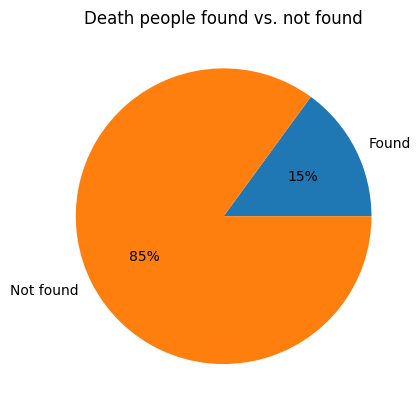

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Found', 'Not found']
titanic_not_survived = titanic[titanic['Survived'] == 0]
titanic_found = titanic[(titanic['Survived'] == 0) & (titanic['Body no.'] > 0)]
perc_titanic_found = titanic_found['Survived'].count()/ titanic_not_survived['Survived'].count()
# titanic_not_found = titanic[(titanic['Survived'] == 0) & (titanic['Body no.'] != 0)]
# perc_titanic_not_found = titanic_not_found['Survived'].count() / titanic_not_survived['Survived'].count()
perc_titanic_not_found = 1-perc_titanic_found
print(perc_titanic_not_found)
print(perc_titanic_found)
plt.pie([perc_titanic_found, perc_titanic_not_found], labels=labels, autopct='%.0f%%')
plt.title('Death people found vs. not found')
plt.show() 

2.	Use feature selection techniques to select the most important features for the models. Try using correlation analysis or feature importance from models like the decision tree or random forest.

3.	Use cross-validation techniques such as k-fold cross-validation to evaluate the models' performance and avoid overfitting.

4.	Use ensemble methods like stacking or blending to combine the predictions from multiple models and improve the overall performance.

5.	Use hyperparameter optimization techniques such as Bayesian optimization or genetic algorithms to find the optimal hyperparameters for the models.

6.	Use techniques like data augmentation or synthetic minority oversampling technique (SMOTE) to handle class imbalance in the target variable.

7.	Use different evaluation metrics like ROC AUC or average precision score to evaluate the models' performance, especially when dealing with imbalanced datasets.

8.	Visualize the models' performance using metrics like confusion matrix, ROC curve, or precision-recall curve to better understand the models' strengths and weaknesses.

9.	Interpret the models' results using techniques like feature importance, partial dependence plots, or SHAP values to understand the factors that contribute to the models' predictions.